### Imports ###

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Processing the Dataset ###
Using the house dataset from week 1

In [73]:
df = pd.read_csv('C:/Users/Bhatt/src/Tamid-TechEdu-S22/Week1/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


### Cleaning ###

In [74]:
df = df.dropna()
df2 = df.loc[df.availability.str.contains('Ready')  & ~df.total_sqft.str.contains(" ") & ~df.total_sqft.str.contains("Acres")]
df2.drop(columns=['society'], inplace=True)
df2

C:\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,area_type,availability,location,size,total_sqft,bath,balcony,price
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.0
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.0,38.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785,5.0,3.0,295.0
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000,2.0,1.0,38.0
...,...,...,...,...,...,...,...,...
13308,Built-up Area,Ready To Move,Bannerghatta Road,3 BHK,1527,3.0,1.0,142.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,1345,2.0,1.0,57.0
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.0


In [75]:
df2['total_sqft'] = df2['total_sqft'].astype(float)
df2

C:\Users\Bhatt\AppData\Local\Temp/ipykernel_8988/1988406046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft'] = df2['total_sqft'].astype(float)


,area_type,availability,location,size,total_sqft,bath,balcony,price
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.0
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.0
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.0
...,...,...,...,...,...,...,...,...
13308,Built-up Area,Ready To Move,Bannerghatta Road,3 BHK,1527.0,3.0,1.0,142.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,1345.0,2.0,1.0,57.0
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.0


### Making a New Column ###

In [76]:
df2['price_per_sqft'] = df2['price'] / df2['total_sqft']
df2

C:\Users\Bhatt\AppData\Local\Temp/ipykernel_8988/529231495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_per_sqft'] = df2['price'] / df2['total_sqft']


,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.0,0.046154
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.0,0.062459
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.0,0.032479
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.0,0.105925
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.0,0.038000
...,...,...,...,...,...,...,...,...,...
13308,Built-up Area,Ready To Move,Bannerghatta Road,3 BHK,1527.0,3.0,1.0,142.0,0.092993
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,1345.0,2.0,1.0,57.0,0.042379
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.0,0.065306
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.0,0.066898


### Graphing a Scatter Plot ###

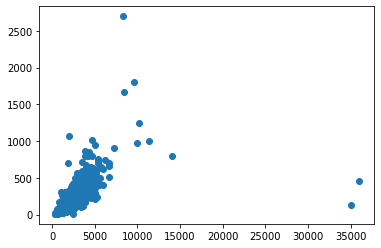

In [77]:
x = 'total_sqft'
y = 'price'
plt.plot(x, y, data=df2, linestyle = 'none', marker = 'o')

### Line of Best Fit ###

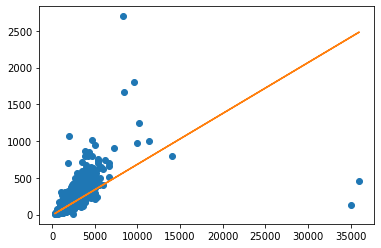

In [78]:
x = 'total_sqft'
y = 'price'
plt.plot(x, y, data=df2, linestyle = 'none', marker = 'o')
m, b = np.polyfit(df2[x], df2[y], 1)
plt.plot(df2[x], m * df2[x] + b)

We can interpret the above graph as a strong correlation between total sqft and price.

## Graph Gallery Stuff! ##

#### Making a bubble plot for this dataset ####

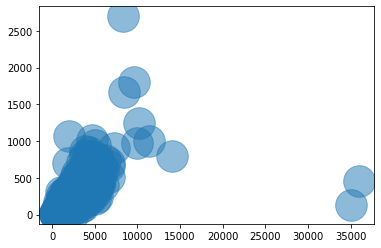

In [79]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns

# use the scatterplot function to build the bubble map
plt.scatter(df2[x], df2[y], s=1000, alpha=0.5)

# show the graph
plt.show()

#### Corellelogram ####

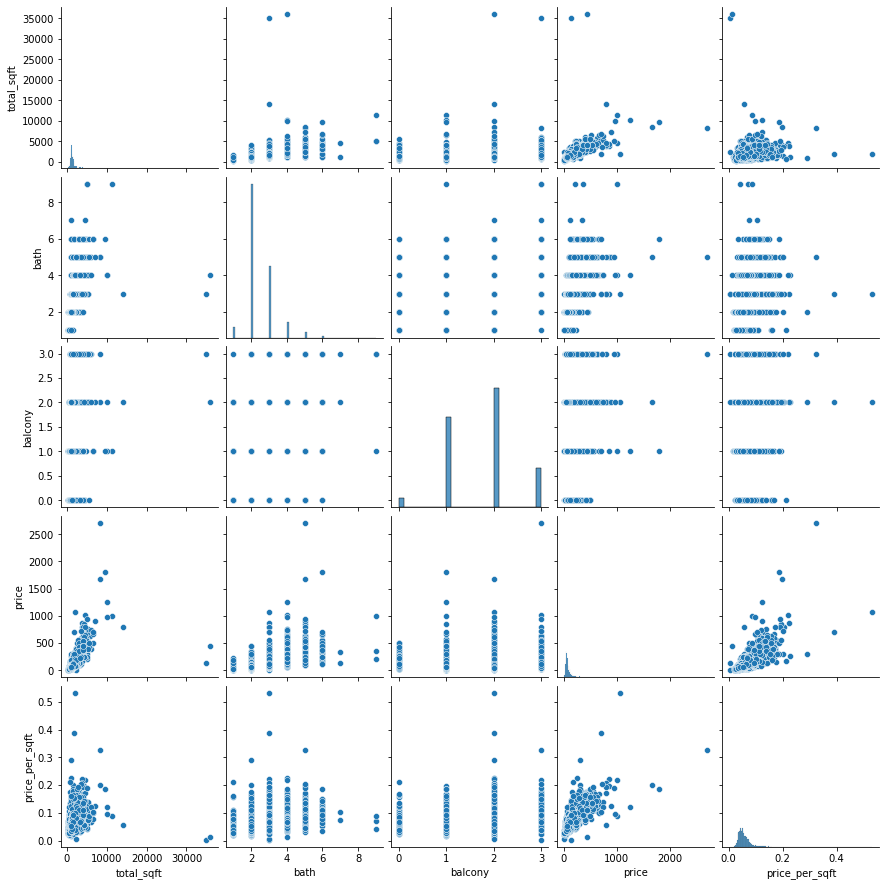

In [80]:
sns.pairplot(df2)
plt.show()

### Plotting Individual Columns ###

<AxesSubplot:>

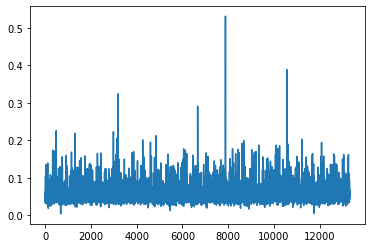

In [81]:
df2['price_per_sqft'].plot()

### Plotting Columns on Each Other ###

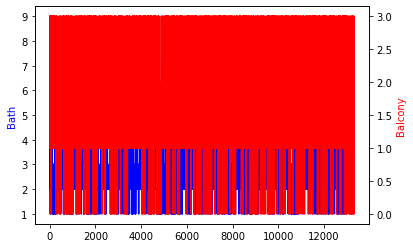

In [82]:
fig, ax = plt.subplots()
ax.plot(df2['bath'], color = 'blue')
ax.set_ylabel("Bath", color = 'blue')
ax2 = ax.twinx()
ax2.plot(df2['balcony'], color = 'red')
ax2.set_ylabel("Balcony", color = 'red')
plt.show()

C:\Users\Bhatt\AppData\Local\Temp/ipykernel_8988/2174933017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price_per_sqft_x_1000'] = df2['price_per_sqft'] * 1000


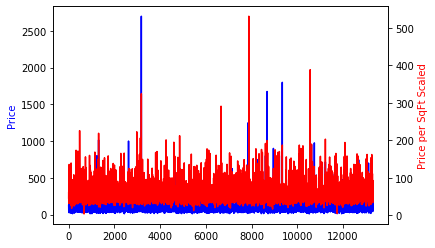

In [84]:
df3 = df2
df3['price_per_sqft_x_1000'] = df2['price_per_sqft'] * 1000

fig, ax = plt.subplots()
ax.plot(df3['price'], color = 'blue')
ax.set_ylabel("Price", color = 'blue')
ax2 = ax.twinx()
ax2.plot(df2['price_per_sqft_x_1000'], color = 'red')
ax2.set_ylabel("Price per SqFt Scaled", color = 'red')
plt.show()

In [85]:
df2.to_csv('better_house_data.csv')